<a href="https://colab.research.google.com/github/TottiPuc/Machine_learning/blob/master/CNN_con_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Convolutional Neural Network con TensorFlow

En este notebook construiremos una red neuronal convolucional para realizar un reconocimiento de objetos usando el dataset cifar10 que esta incluido en la libreria keras

In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

Cargamos el dataset y realizamos su respectivo pre procesamiento

In [0]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

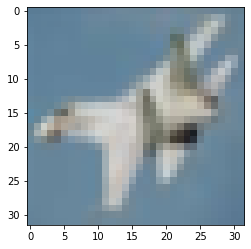

In [3]:
#verificacmos si esta bien cargado
plt.imshow(x_test[10])

In [0]:
#configuramos los nombres de las etiquetas del dataset
class_names = ['avion','coche','pajaro','gato','ciervo','perro','rana','caballo','barco','camion']

Normalizamos el conjunto de entrenamiento y de teste

In [0]:
x_train , x_test = x_train/255.0 , x_test/255.0

#Creación del modelo convolucional
utilizando la libreria keras contruiremos una arquitectura de red neuronal convolucional para la detección de objetos 

In [0]:
model = tf.keras.models.Sequential()

añadimos la primera capa convolucional la cual consta de:


*   32 filtros
*   kernel de 3x3
*   pading:same, con el fin de completar con ceros si el kernel no tiene el tamaño suficiente para realizar la convoluciòn 
*   función de activación ReLu
*   input_shape (32x32x3) 

In [0]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=5,padding="same",activation="relu",input_shape=[32,32,3]))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding="valid"))

Despues de aplicar la primera capa de convolucion se aplica una segunda capa de convolución seguida por una capa de maxpooling que es la encargada de dar un formato a la imagen convolucionada esto es extraer el valor mas alto en una ventan de análisis que reducira considerablemente su dimensión 

In [0]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=5,padding="same",activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding="valid"))

Añadimos una nueva capa de convolución pero con el doble de filtros

In [0]:
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=5,padding="same",activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding="valid"))

Finalmente creamos la capa de conexión totoal que sera recibir los valores aplanados de la etapa enterior. Esto se trata de una etapa de red neuronal normal donde todos los neurones estan conectados con todos

In [0]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128,activation="relu")) # 

finalmente añadimos la capa de salida que es la de la predicción de las clases que son 10

In [0]:
model.add(tf.keras.layers.Dense(units=10,activation="softmax"))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0

Finalmente evaluamos el modelo y calculamos su precisión

In [0]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics='sparse_categorical_accuracy')

In [14]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 148s 95ms/step - loss: 1.4649 - sparse_categorical_accuracy: 0.4669
Epoch 2/10
1563/1563 [==============================] - 149s 95ms/step - loss: 1.0622 - sparse_categorical_accuracy: 0.6257
Epoch 3/10
1563/1563 [==============================] - 149s 95ms/step - loss: 0.8939 - sparse_categorical_accuracy: 0.6848
Epoch 4/10
1563/1563 [==============================] - 149s 95ms/step - loss: 0.7765 - sparse_categorical_accuracy: 0.7277
Epoch 5/10
1563/1563 [==============================] - 149s 95ms/step - loss: 0.6830 - sparse_categorical_accuracy: 0.7585
Epoch 6/10
1563/1563 [==============================] - 149s 95ms/step - loss: 0.6052 - sparse_categorical_accuracy: 0.7877
Epoch 7/10
1563/1563 [==============================] - 149s 95ms/step - loss: 0.5362 - sparse_categorical_accuracy: 0.8108
Epoch 8/10
1563/1563 [==============================] - 149s 95ms/step - loss: 0.4749 - sparse_categorical_accuracy: 0.8336
Epoch 9/

Iniciamos las predicciones y obtenemos la precisión del modelo

In [15]:
test_loss, test_accuracy = model.evaluate(x_test,y_test)

313/313 [==============================] - 9s 27ms/step - loss: 1.0884 - sparse_categorical_accuracy: 0.7038
